In [1]:
import numpy as np
from matplotlib import pyplot as plt

In [2]:
from cxai import factory
from cxai import utils as putils

from cxai import inspector

# Introduction

WHAT ARE we doing? 

In [3]:
NSID = "n02802426"
TOTAL_IMAGES = 4
NUMBER_SUBSPACES = 4
LAYER = "conv4_3"

In [4]:
label = putils.imagenet.get_index_from_imagenet_id(NSID)
class_name = putils.imagenet.get_desc_from_imagenet_id(NSID)
NSID, label, class_name

('n02802426', 430, 'basketball')

In [5]:
model, (rc_transform, input_transform) = factory.make_model("torchvision-vgg16-imagenet")

In [6]:
images = list(map(
    lambda i: putils.load_image(f"../data/images/img-{i}.jpg"),
    range(4)
))

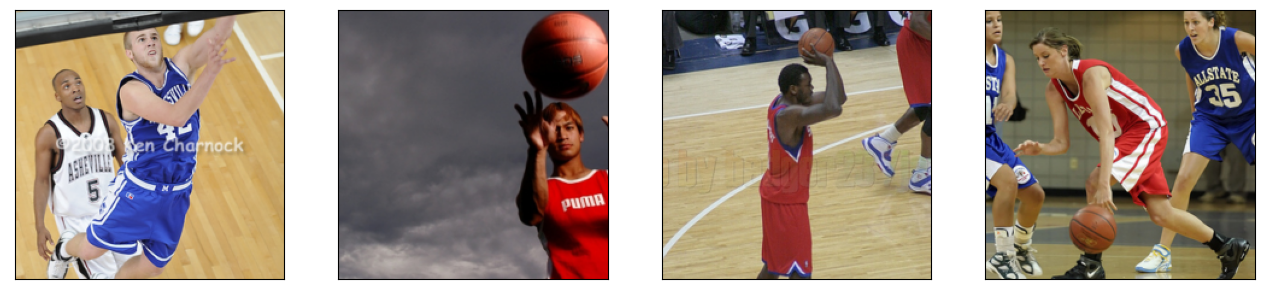

In [7]:
def ano():
    
    ncols = TOTAL_IMAGES
    
    plt.figure(figsize=(4*ncols, 4))
    
    for i in range(ncols):
        plt.subplot(1, ncols, i+1)
        putils.viz.imshow(
            rc_transform(images[i])
        )
ano()

In [8]:
model, (rc_transform, input_transform) = factory.make_model("torchvision-vgg16-imagenet")

In [9]:
explainer = factory.make_explainer("lrp", model)

# PRCA

what is the calculation?

In [10]:
# traing .. eigh(...)

In [11]:
# visualization

# DRSA

how to loss; traing function, .... 

In [12]:
weights = np.load(f"../data/raw/{NSID}/training-samples/torchvision-vgg16-imagenet-conv4_3/lrp/bases/drsa-ns4-ss128-sm2-seed1/weights.npy")

weights.shape

(512, 4, 128)

In [13]:
insp = inspector.GroupBasisInspector(
    layer=LAYER,
    weights=weights
)

mat_act_encoding torch.Size([512, 512])
mat_act_decoding torch.Size([512, 512])
self.mat_ctx_encoding.shape torch.Size([512, 512, 1, 1])


/home/pat/projects/drsa-demo/venv/lib/python3.9/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


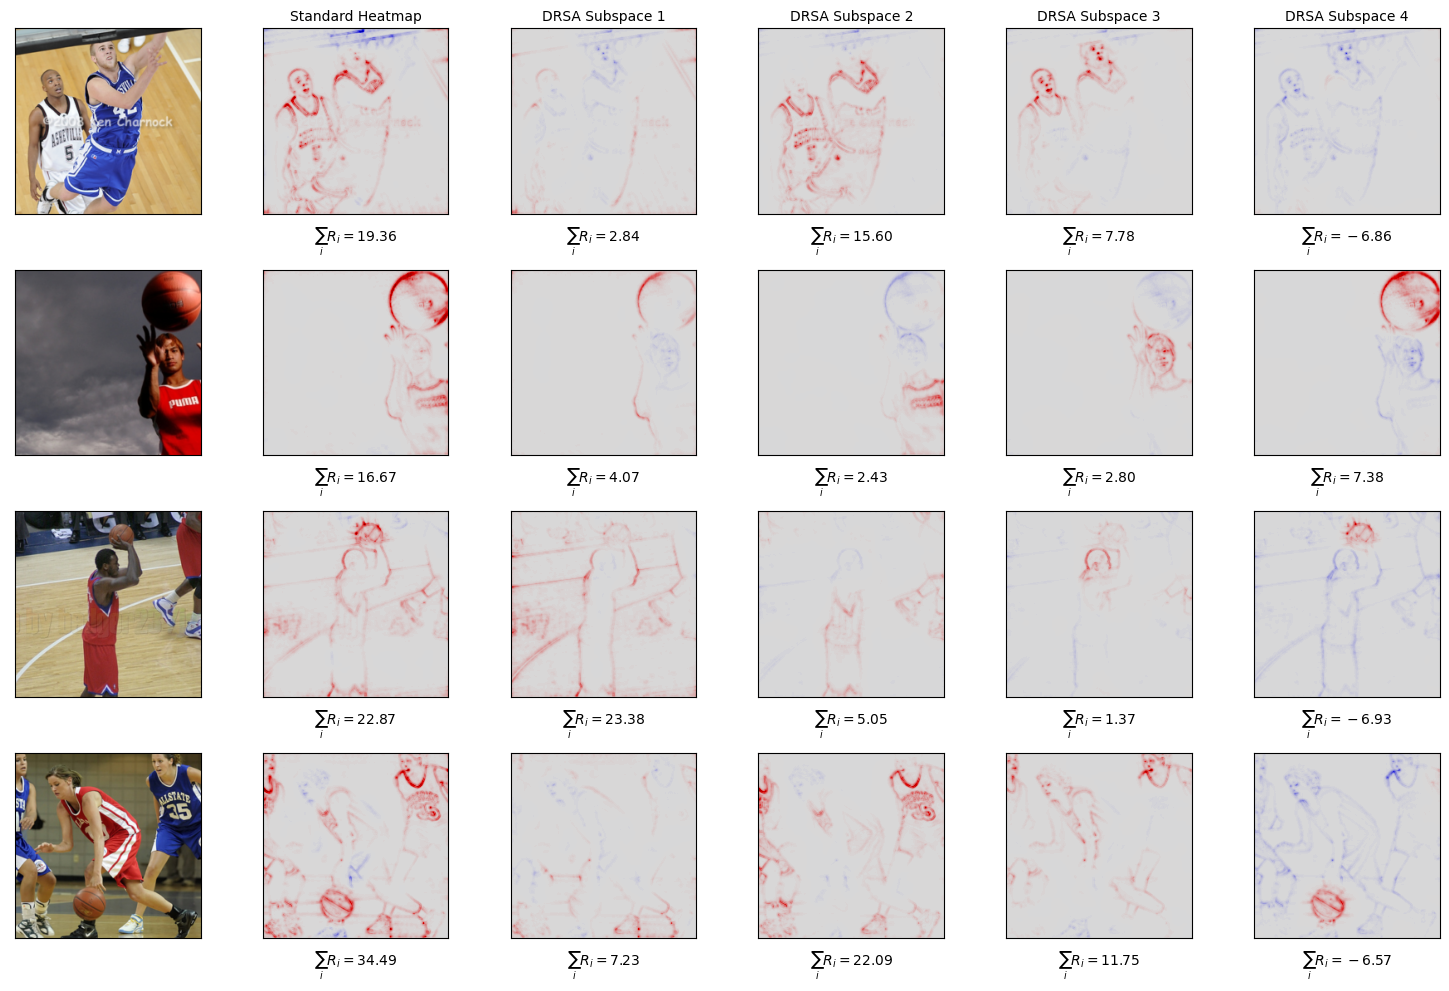

In [14]:
def ano():
    nrows = TOTAL_IMAGES
    ncols = 3 + NUMBER_SUBSPACES
    
    size = 2.5
    
    plt.figure(figsize=(size*ncols, size*nrows))
    
    
    for ix, img in enumerate(images):
        
        _, standard_heatmap, inspection_info = explainer.explain_with_inspector(
            input_transform(img),
            label,
            inspector=insp,
            top_k=4
        )

        canonical_order = np.argsort(inspection_info.top_k_sources)
        subspace_heatmaps = inspection_info.input_top_k_source_heatmaps[canonical_order, :, :, :]

        # sum over channels
        subspace_heatmaps = subspace_heatmaps.sum(axis=1)
        standard_heatmap = standard_heatmap.sum(axis=0)

        plt.subplot(nrows, ncols, ix*ncols + 1)
        putils.viz.imshow(rc_transform(img))
        
        plt.subplot(nrows, ncols, ix*ncols + 2)
        putils.viz.heatmap(
            standard_heatmap,
            title=f"Standard Heatmap" if ix == 0 else "",
        )
        
        # visualization
        for six in range(NUMBER_SUBSPACES):
            plt.subplot(nrows, ncols, ix*ncols + 3 + six)

            putils.viz.heatmap(
                subspace_heatmaps[six],
                title=f"DRSA Subspace {six+1}" if ix == 0 else "",
                reference_heatmap=standard_heatmap
            )
    plt.tight_layout()
ano()